In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

In [11]:
model = load_model('../model/model.h5')
model.load_weights('../model/model_weights.h5')

In [23]:
image_size = (180, 180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../DataSet/Test",
#     validation_split=0.2,
#     subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 20001 files belonging to 2 classes.


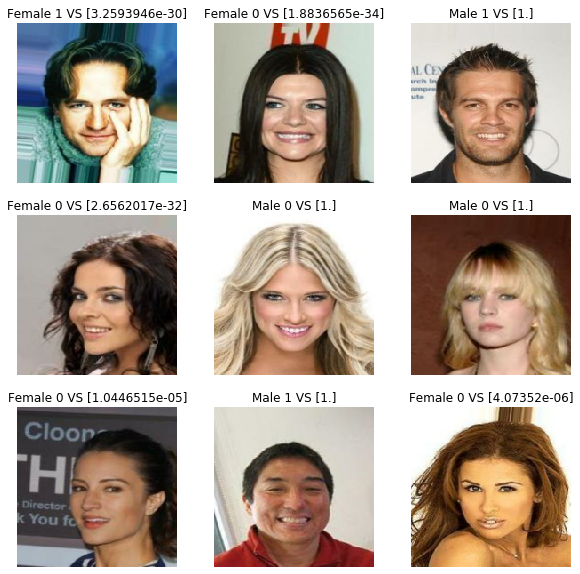

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        img_array = keras.preprocessing.image.img_to_array(images[i])
        img_array = tf.expand_dims(img_array, 0)  # Create batch axis
        predictions = model.predict(img_array)
        score = predictions[0]
        if score > 0.5:
            label_disp = 'Male'
        else:
            label_disp = 'Female'
        label_disp = label_disp +" "+str(int(labels[i])) + " VS "+str(score)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(label_disp)
        plt.axis("off")

In [22]:
# filepath = '../Dataset/Test/Female/160005.jpg'
# filepath = '../Dataset/Test/Male/160015.jpg'
img = keras.preprocessing.image.load_img(
    filepath, target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis


predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent Female and %.2f percent Male."
    % (100 * (1 - score), 100 * score)
)

This image is 100.00 percent Female and 0.00 percent Male.
